<a href="https://colab.research.google.com/github/LiyaUnknown/fashion_mnist_nn/blob/main/fashion_mnist_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modules 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# loading data set 

data = tf.keras.datasets.fashion_mnist
(train_ , train_labels) , (test_ , test_labels) = data.load_data()

In [ ]:
# let's look at the data 
print(f'shapes of train data {train_.shape}')
print(f'shapes of train data {test_.shape}')

print(f'labels of training data {list(set(train_labels))}')
print(f'labels of test data {list(set(test_labels))}')

shapes of train data (60000, 28, 28)
shapes of train data (10000, 28, 28)
labels of training data [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
labels of test data [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


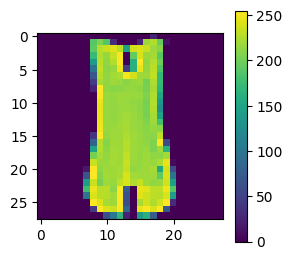

In [ ]:
# now we wnat to see what type of images we have 

plt.figure(figsize = (3,3))
plt.imshow(train_[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# convert training data betwin 0 and 1

train_ = train_ / 255.0
test_ = test_ / 255.0

In [96]:
# making our model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(150 , 4 , input_shape = (28 , 28 , 1)))
model.add(tf.keras.layers.MaxPool2D(5 , 5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128 , activation = 'relu'))
model.add(tf.keras.layers.Dense(10 , activation = 'softmax'))


In [97]:
# Now it's time to compile our modle 

op = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer = op , loss = loss , metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 25, 25, 150)       2550      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 150)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 3750)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               480128    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 483,968
Trainable params: 483,968
Non-trainable params: 0
________________________________________________

In [99]:
# So , everything is already done and we can fit the model for train

epochs = 10
his = model.fit(train_ , train_labels , validation_data = (test_ , test_labels) , epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.4281 - accuracy: 0.8473 - val_loss: 0.3484 - val_accuracy: 0.8737
Epoch 2/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.2910 - accuracy: 0.8940 - val_loss: 0.3450 - val_accuracy: 0.8722
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2502 - accuracy: 0.9083 - val_loss: 0.2894 - val_accuracy: 0.8936
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2242 - accuracy: 0.9178 - val_loss: 0.2631 - val_accuracy: 0.9057
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2050 - accuracy: 0.9237 - val_loss: 0.2681 - val_accuracy: 0.9080
Epoch 6/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1884 - accuracy: 0.9291 - val_loss: 0.2624 - val_accuracy: 0.9095
Epoch 7/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1714 - accuracy: 0.9357 - val_loss: 0.2601 -

In [100]:
# lets see what kind of accuracy our model get with this training

loss_ , acc_ = model.evaluate(test_ , test_labels)

print(f'the accuracy of this model is {round(acc_ * 100)}')
print(f'the full loss of this model is {round(loss_ * 100)}')

313/313 [==============================] - 3s 10ms/step - loss: 0.2897 - accuracy: 0.9068
the accuracy of this model is 91
the full loss of this model is 29


In [101]:
# this is the all information of model history
his.history

{'loss': [0.42811688780784607,
  0.29103517532348633,
  0.25018519163131714,
  0.22415298223495483,
  0.20503441989421844,
  0.18839576840400696,
  0.17139960825443268,
  0.15892617404460907,
  0.14910346269607544,
  0.13641397655010223],
 'accuracy': [0.8472999930381775,
  0.8939666748046875,
  0.90829998254776,
  0.9177833199501038,
  0.9237333536148071,
  0.9290500283241272,
  0.935699999332428,
  0.9400333166122437,
  0.9442333579063416,
  0.9488000273704529],
 'val_loss': [0.3484446704387665,
  0.34495100378990173,
  0.2893970012664795,
  0.26305872201919556,
  0.2681151032447815,
  0.2624419927597046,
  0.26005271077156067,
  0.2929784655570984,
  0.279237300157547,
  0.2896784245967865],
 'val_accuracy': [0.8737000226974487,
  0.8722000122070312,
  0.8935999870300293,
  0.9057000279426575,
  0.9079999923706055,
  0.909500002861023,
  0.9090999960899353,
  0.9050999879837036,
  0.9092000126838684,
  0.9067999720573425]}

<Figure size 500x500 with 0 Axes>

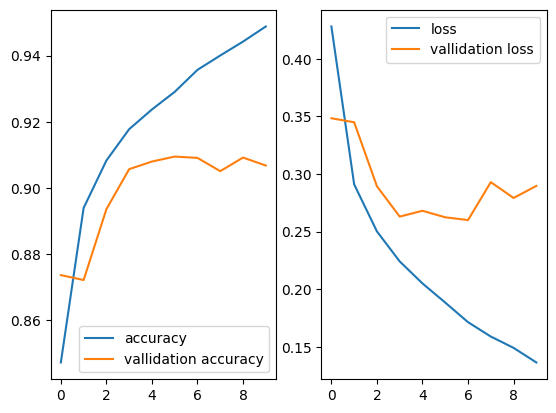

In [102]:
# plot the information of model

plt.figure(figsize = (5 , 5))

loss_spot = his.history['loss']
acc_spot = his.history['accuracy']
val_loss_spot = his.history['val_loss']
val_acc_spot = his.history['val_accuracy']

epoch_range = range(epochs)

fig , axis = plt.subplots(1,2)

axis[0].plot(epoch_range , acc_spot , label = 'accuracy')
axis[0].plot(epoch_range , val_acc_spot , label = 'vallidation accuracy')
plt.legend()


axis[1].plot(epoch_range , loss_spot , label = 'loss')
axis[1].plot(epoch_range , val_loss_spot , label = 'vallidation loss')

axis[0].legend()
axis[1].legend()
plt.show()

In [103]:
# let's try some prediction in our model

label_names = ['Tshirt\Top' ,'Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot']

prediction = model.predict(test_)
image_value = 10
image_name = label_names[np.argmax(prediction[image_value])]

image_name

313/313 [==============================] - 4s 11ms/step


'Coat'

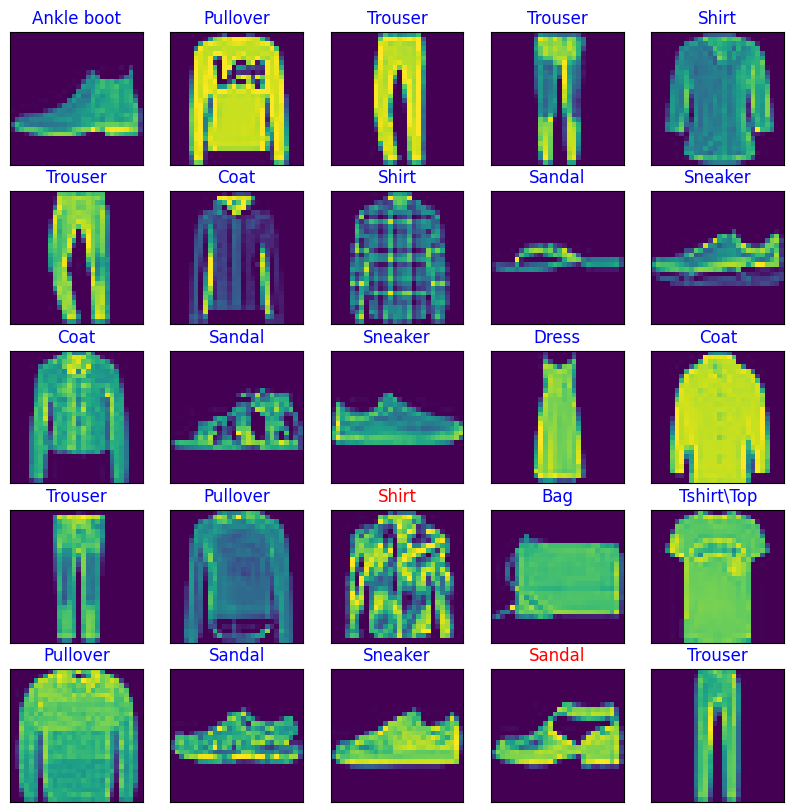

In [104]:
# plot the image with predicted label

plt.figure(figsize = (10 , 10))

for value in range(25) : 
    plt.subplot(5,5,value+1)
    plt.imshow(test_[value])
    plt.xticks([])
    plt.yticks([])

    lbl_color = 'blue' if np.argmax(prediction[value]) == test_labels[value] else 'red'
    plt.title(label_names[np.argmax(prediction[value])] , color = lbl_color)

plt.show()